# QUIZ

# Question 1
Hierarchical Clustering is a method of grouping data points into clusters based on similarity. Unlike other clustering techniques, the number of clusters is not specified beforehand in Hierarchical Clustering. This approach can be executed using either an Agglomerative or Divisive method.

In the Divisive method, all data points are initially treated as one cluster and then split into smaller sub-clusters. The process continues until each data point is in its own cluster or a predetermined stopping criterion is met.

In the Agglomerative method, each data point starts as its own cluster and then gradually merged into larger clusters. The merging process is based on a similarity measurement between the clusters.

The hierarchy of clusters produced by Hierarchical Clustering can be visualized using a dendrogram. This graph represents each data point as a leaf node and each cluster as a non-leaf node. The height of the branches in the dendrogram reflects the similarity between the merged clusters. By determining the appropriate height to cut the dendrogram, the number of clusters can be decided.

# Question 2
The goal of K-Means is to minimize the sum of squared distances between each data point and the centroid of the cluster to which it belongs.

The objective function that K-Means attempts to minimize can be mathematically expressed as an optimization over $S_i$ and $c_i$:

$$\{(S_i, c_i)\}_{i=1,...,k} = argmin \sum_{i=1}^{k} \sum_{x \in S_i}\Vert x - c_i \Vert^2$$

where $x_i$ are our samples and $c_i$ our centers. We also predefine the number of cluster $k$, and $S_i$ is a partition of all the samples $\{x_i\}$. 

The objective of minimizing this function is to produce clusters where the data points within each cluster are as close to the centroid as possible. The algorithm works iteratively by reassigning data points to the nearest centroid and updating the centroid to the mean of the assigned data points until the objective function converges to a local minimum.

# Question 3

Four scenarios where K-Means may fail:

1. Unequal Cluster Sizes: K-Means assumes that all clusters have the same number of data points, which may not always be the case. If the sizes of clusters differ, K-Means may not produce useful results.


2. Non-Circular Clusters: K-Means assumes that clusters are circular and compact, but this may not always be the case. In situations where clusters have non-circular shapes, K-Means may not be the ideal choice.


3. Heterogeneous Cluster Densities: K-Means assumes that all clusters have an equal density, which may not always be accurate. If the densities of clusters vary, K-Means may not be able to produce meaningful results.


4. Unusual Data Points: Unusual data points, which significantly differ from other data points, can significantly impact the final clusters generated by K-Means. In some cases, these unusual data points can cause the centroid of a cluster to shift, leading to incorrect results.


# Question 4
1. Gaussian Mixtures: probabilistic clustering method that models each cluster as a mixture of multiple Gaussian distributions, represented as general ellipsoids instead of spheres. It estimates the parameters of the Gaussian distributions by maximizing the likelihood of the data given the model.


2. Mini-batch K-Means: used for data sets that do not fit into memory. Instead of processing the entire data set at once, Mini-batch K-Means processes subsets of the data, known as mini-batches, which are randomly sampled at each training iteration. This drastically reduces the amount of computation required and results in a more scalable and efficient algorithm. The results obtained from Mini-batch K-Means are generally only slightly worse than those obtained from the standard K-Means algorithm.


3. K-Median: uses the median of the points within a cluster instead of the centroid. This results in minimizing the L1 norm instead of the L2 norm, making K-Median more robust to outliers and suitable for data with non-uniform distributions. The K-Median algorithm partitions a set of data points into k clusters, where each cluster is defined by the median of its member data points.

# Question 5
Inductive methods involve observing examples and using these observations to formulate general laws or rules. A model is constructed from a training set, and can be used to make predictions on new unseen data, without the need for reconstruction. K-means is a well-known example of an inductive method.

On the other hand, transductive methods require observing all the training and testing points in order to build the model. This approach utilizes specific training cases to make conclusions about a particular testing set only. If the testing set changes, the algorithm must be re-run. A prominent instance of a transductive method is SVM. In transductive SVM, the prediction for a new data point depends on the entire dataset, rather than just the model built from the training set.

# Question 6
An example of a valid DBSCAN cluster with fewer than $min\_samples$ points, with $min\_samples \ge 5$ is the following: A 2-dimensional data set $X$ with $9$ points in which we have 2 clusters and one central point that lies at equidistance between the 2 cluster cores. This distance is the edge distance for the central point to be detected with the "eps" parameter, but just not close enough to connect the two clusters. Example below. 

In [57]:
import numpy as np
def generate_X(min_samples):
    X = np.array([[0.0,0.0] for _ in range(min_samples*2-1)])
    X[0] = [0, 0]
    X[1] = [1, 1]
    X[2] = [-1, -1]
    
    for i in range(min_samples*2-4):
        rand1 = np.random.rand()
        rand2 = np.random.rand()
        if i%2 == 0:
            X[i+3] = [1 + rand1, 1 + rand2]
        else:
            X[i+3] = [-1 - rand1, -1 - rand2]
    return X
    

In [58]:
min_samples = 5
X = generate_X(min_samples)

Below you can see the data set with 2 clear clusters and a central point at [0, 0]

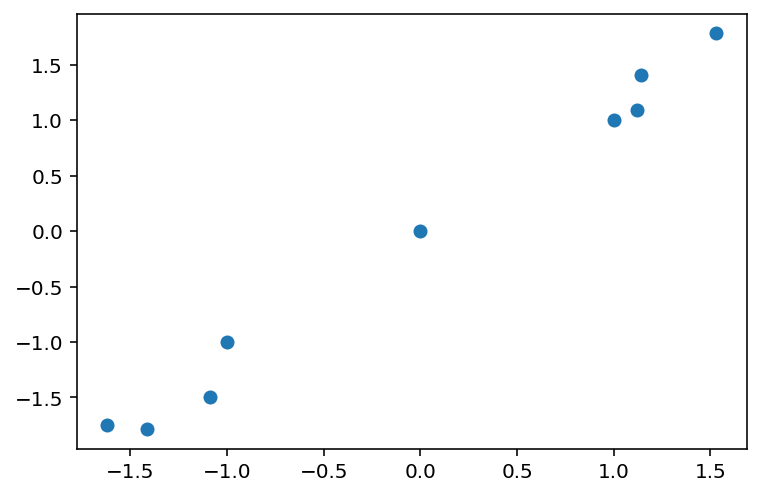

In [59]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X[:,0], X[:,1])

Since the point [0, 0] is not a core point, it does not connect the two clusters. One of the clusters will have 5 members, the other only 4.

Core points:
 [1. 1.] and [-1. -1.]


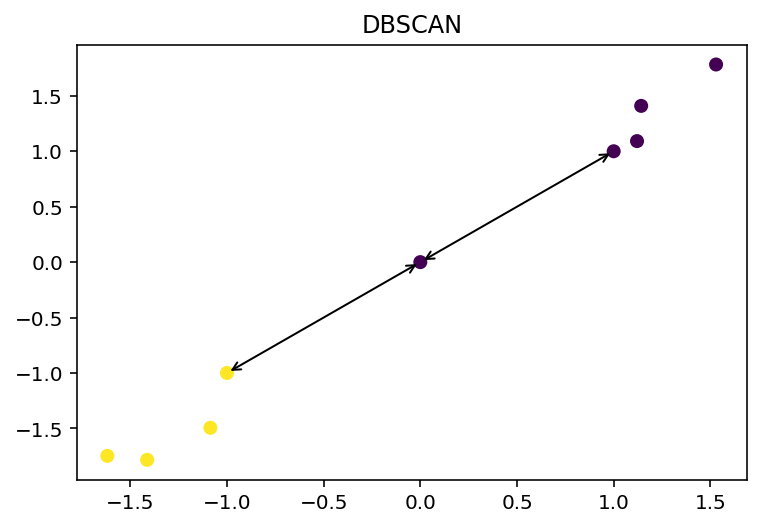

In [60]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=np.sqrt(2), min_samples=min_samples).fit(X)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=db.labels_)
plt.annotate(text='', xy=(0,0), xytext=(1,1), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='', xy=(0,0), xytext=(-1,-1), arrowprops=dict(arrowstyle='<->'))
plt.title("DBSCAN")
print("Core points:\n", X[db.core_sample_indices_][0], "and", X[db.core_sample_indices_][1])

Both core points are equidistant from the center point. This results in the center point to be "randomly" (usually: first-come) assigned to one of the clusters.

We indeed have 2 valid DBSCAN clusters, where 1 of them is a cluster with fewer than $min\_samples$ points.

# PROGRAMMING

In [61]:
import random 
import numpy as np
from numpy.random import uniform 
import warnings 

import pandas as pd
import plotly.express as px

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn import metrics

import matplotlib.pyplot as plt

%matplotlib inline

Adjusting options for the inline figures

In [62]:
# Adjusting the resolution and format of the inline images

# Possible options: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’
%config InlineBackend.figure_formats = ["retina"]
# %config InlineBackend.figure_formats = ["svg"]

In [63]:
# Setting the dpi of the inline figures
# plt.rcParams["figure.dpi"] = 200

In [64]:
# Available styles (these will change the colormap as well)

# Colorblind options; uncomment to select an option:
# plt.style.use("seaborn-colorblind")
# plt.style.use("tableau-colorblind10")

# To print all the possible options:
# plt.style.available

In [65]:
# Adjusting the colormap (also modified by the commands above)
# plt.rcParams["image.cmap"] = "cividis"

In [66]:
def scatter_blobs(X,y,title):
    plt.scatter(X[:, 0], X[:, 1], c=y) 
    plt.title(title) 
    plt.show()

# K-means in scikit-learn 

We use the Gaussian blobs dataset to showcase K-means in scikit-learn.

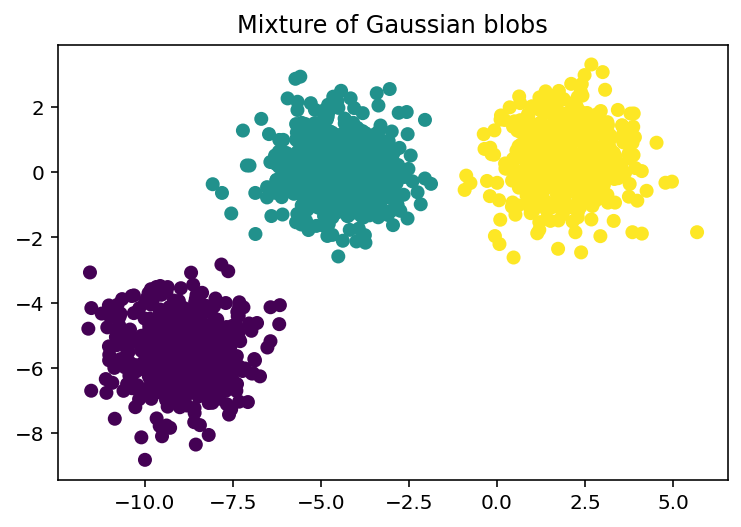

In [67]:
n_samples = 1500
random_state = 170

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

scatter_blobs(X,y,"Mixture of Gaussian blobs")

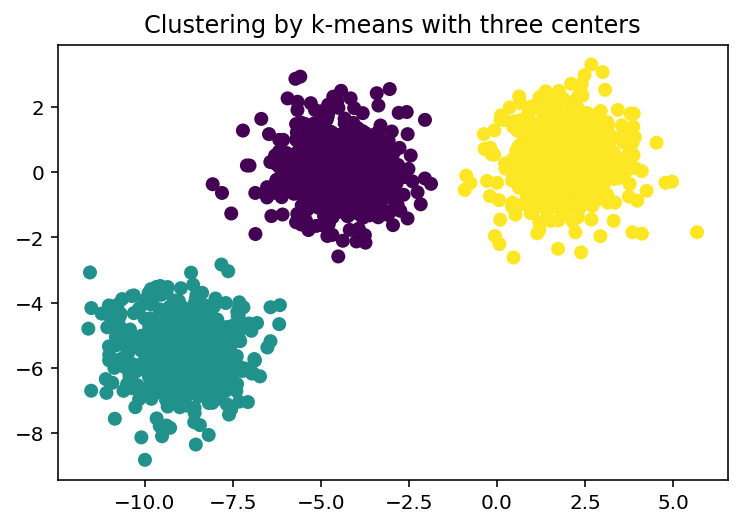

In [68]:
sklearn_kmean = KMeans(n_init=10, n_clusters=3)
sklearn_kmean.fit(X) 
scatter_blobs(X,sklearn_kmean.labels_,"Clustering by k-means with three centers")

# Q1 Implementing k-means from scratch

In this question, you are asked to implement the k-means Clustering Algorithm. The k-means algorithm requires you to specify the number k of clusters/groups a priori, as shown in above sklearn k-means implementation. 

The center of each cluster is a centroid. These centers are randomly initialized. After the initialization, we perform the following iterations to optimize the locations of the k centroids: 


```
repeat until convergence: 
     1. Calculate the distance from each point to each centroid.
     2. Assign each point to its nearest centroid. 
     3. Centroids are shifted to be the average value of the points belonging to the cluster. 
     (convergence criteria: the location of the centroids stops changing.) 
```

To measure how well a given dataset is clustered by k-means, we use a quantity called `inertia`, which is calculated by summing the squares of the distance between each data point and its corresponding centroid. A good model is one with a small number of clusters and small inertia.

Although we can use different measures of distance, for this homework, we only use the Euclidean distance as our metric. You are given a helper function `euclidean_dist2(point, data)`, which returns the Euclidean distance squared between a point to a dataset. 

You are provided the first part of the class `my_KMeans`, which you will need to complete. You are already given the `__init__` method, and the first part of `fit_transform(self, X_train)`. You should implement the rest of the member function to return the following quantities in this order: the location of the centroids with size `(n_clusters, m)`, the centroid indices with size `(n, )` (i.e., the index of the centroid the `X_train` belongs to), and inertia. We assume that `X_train` has size `(n, m)`.

In [69]:
def euclidean_dist2(point, data):
    """
    Squared Euclidean distance between data and point.
    Dimensions:
    data: (n,m)
    point: (m,)
    output: (n,)
    """
    return np.sum((point - data)**2, axis=1)

In [70]:
class my_KMeans:

    def __init__(self, n_clusters=5, max_iter=300, init=None):
        self.n_clusters = n_clusters 
        self.max_iter = max_iter 
        self.init = init

    def fit_transform(self, X_train):
        if self.init is not None:
            centroids = self.init 
        else: 
        # Randomly initialize the centers using the 'sklearns++' technique, which 
        # selects the initial cluster centroids using sampling based on an empirical probability 
        # distribution of the points’ contribution to the overall inertia. This technique
        # speeds up convergence.
            centroids = [random.choice(X_train)]
            for _ in range(self.n_clusters-1):
                # Calculate distances from points to the centroids
                dists = np.sum([np.sqrt(euclidean_dist2(centroid, X_train)) for centroid in centroids], axis=0)
                # Normalize the distances
                dists /= np.sum(dists)
                # Choose point based on their distances
                new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
                centroids += [X_train[new_centroid_idx]]

        iteration = 0 

        # start your implementation here!
        
        centroid_idx = np.zeros(X_train.shape[0])

        for _ in range(self.max_iter):
        
            distances = [np.sqrt(euclidean_dist2(centroid, X_train)) for centroid in centroids]
            point2centroid = np.argmin(distances, axis=0)
        
            for n in range(self.n_clusters):
                cluster_idx = []
                for i in range(len(point2centroid)):
                    if point2centroid[i] == n:
                        cluster_idx.append(i)
                        centroid_idx[i] = n
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore", category=RuntimeWarning)
                    centroids[n] = np.mean(X_train[cluster_idx,:], axis=0)
        
        inertia = np.sum([(centroids[int(centroid_idx[i])]-X_train[i,:])**2 for i in range(X_train.shape[0])])
        
        return np.array(centroids).reshape((self.n_clusters,-1)), centroid_idx, inertia


To evaluate your implementation, compare the output of your k-means implementation with the k-means implementation from the Sklearn library. First, we should notice that the k-means algorithm is not deterministic due to the random initialization of the centroids. However, k-means becomes deterministic after we fix the initialization. 

In [71]:
n_samples = 300 

# number of failures 

num_of_mismatches = 0 

for i in range(100): 

    # Generating random Gaussian blobs dataset 
    n_centers = random.randint(2,5) 
    X, y = make_blobs(n_samples=n_samples, centers=n_centers) 

    # Randomly initialize the centers using the 'sklearns++' technique, which 
    # selects initial cluster centroids using sampling based on an empirical probability 
    # distribution of the points’ contribution to the overall inertia. This technique
    # speeds up convergence. 
    init_centroids = [random.choice(X)]
    for _ in range(n_centers-1):
        # Calculate distances from points to the centroids
        dists = np.sum([np.sqrt(euclidean_dist2(centroid, X)) for centroid in init_centroids], axis=0)
        # Normalize the distances
        dists /= np.sum(dists)
        # Choose remaining points based on their distances
        new_centroid_idx, = np.random.choice(range(len(X)), size=1, p=dists)
        init_centroids += [X[new_centroid_idx]]

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sklearn_kmean = KMeans(n_clusters=n_centers, init=np.asarray(init_centroids), tol=1e-10) 
        sklearn_kmean.fit(X)
    my_kmean = my_KMeans(n_clusters=n_centers, init=init_centroids) 
    centroids, _, my_kmean_inertia = my_kmean.fit_transform(X) 

    if i % 10 == 0: 
        print(i) 

    if abs(sklearn_kmean.inertia_ - my_kmean_inertia) > 1: 
        num_of_mismatches += 1 
        print('sklearn_kmean.inertia: {:.3f}, my_kmean_inertia: {:.3f}'.format(
            sklearn_kmean.inertia_, my_kmean_inertia))
        assert num_of_mismatches < 5, 'too many mismatches!'
        
# You may see a few
# "[kmeans] empty cluster at iteration ..."
# and
# sklearn_kmean.inertia:XXX, my_kmean_inertia:XXX
# because of poor convergence due to a bad initialization.
# If your code works correctly, the number of mismatches should be less than 5.

0
10
20
30
40
50
60
70
80
sklearn_kmean.inertia: 611.011, my_kmean_inertia: 22126.362
90


# Result
The test shows that the number of mismatches of my implementation is less than 5, which indicates that my code is working correctly.

# Q2 Select the optimal $k$ by looking at the graph of inertia vs $k$

For this question, you should implement the function` plot_inertia(X)`. This function will take in an input `X` and run your implementation `my_KMeans` multiple times with different hyperparameters `k` (i.e., the number of clusters). You should record the inertia value for different `k`, and make a plot of `k` vs `inertia`. Observe your graph and comment on how you should select the optimal value of `k` for k-means based on the graph. Is the optimal value you found close to the ground truth value? 

In [72]:
def plot_inertia(X): 
    # start your implementation here!
    k_vec = np.arange(1, 11)
    inertia_vec = []
    for k in k_vec:
        Kmeans = my_KMeans(n_clusters=k)
        centroids, idx, inertia = Kmeans.fit_transform(X)
        inertia_vec.append(inertia)
    
    plt.figure()
    plt.plot(k_vec, inertia_vec)
    plt.xlabel("number of clusters (k)")
    plt.ylabel("computed inertia")
    plt.title("inertia of Kmeans algorithm for different numbers of clusters")
    plt.xticks(k_vec)
    plt.show()

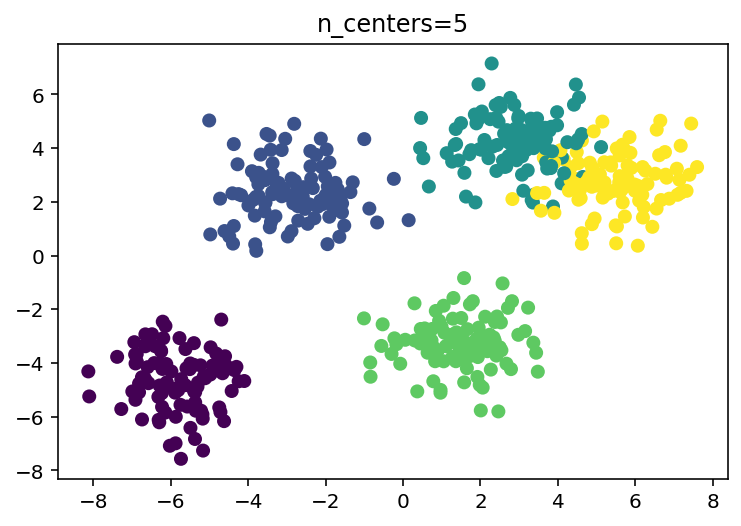

In [73]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=250, centers=5)
scatter_blobs(X,y,"n_centers=5")

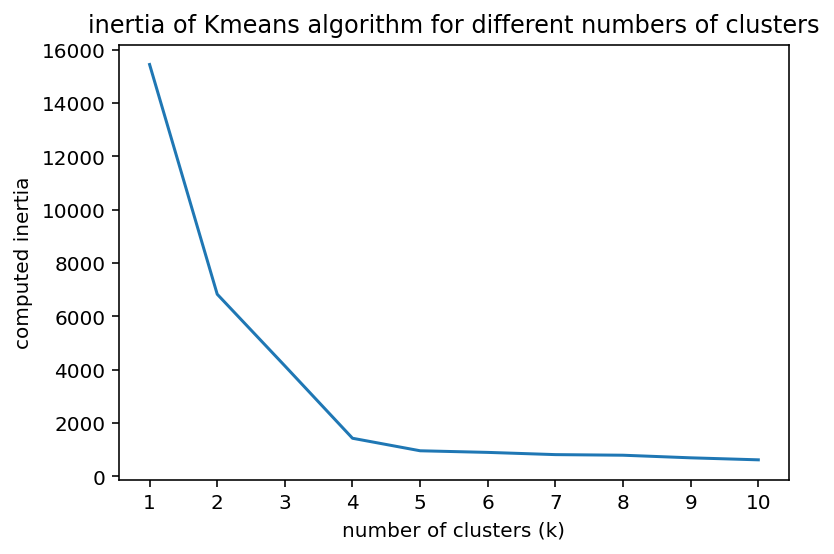

In [74]:
plot_inertia(X)

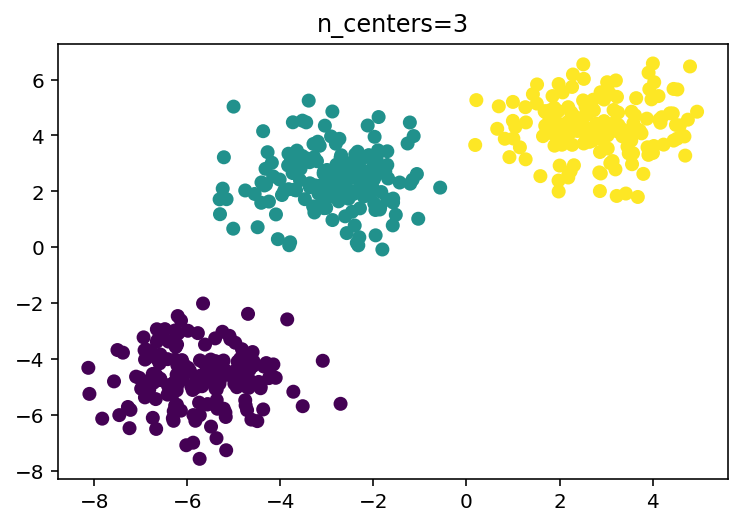

In [75]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=250, centers=3) 
scatter_blobs(X,y,"n_centers=3")

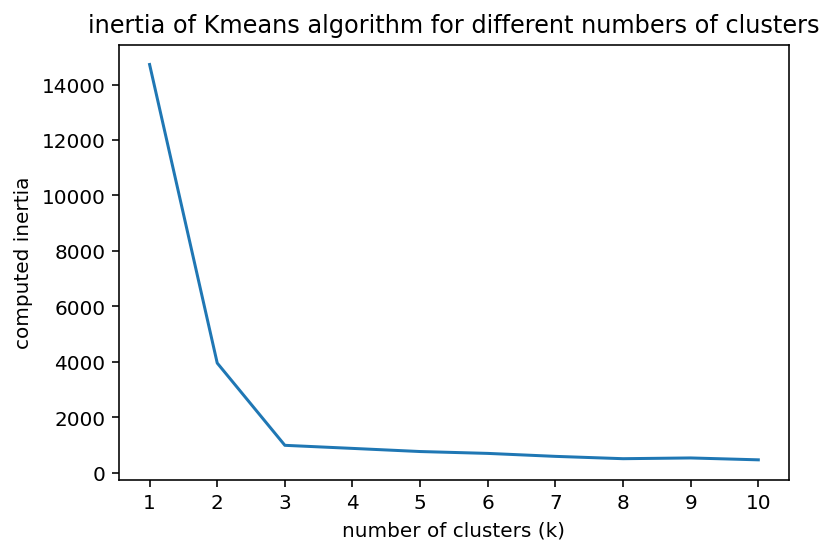

In [76]:
plot_inertia(X)

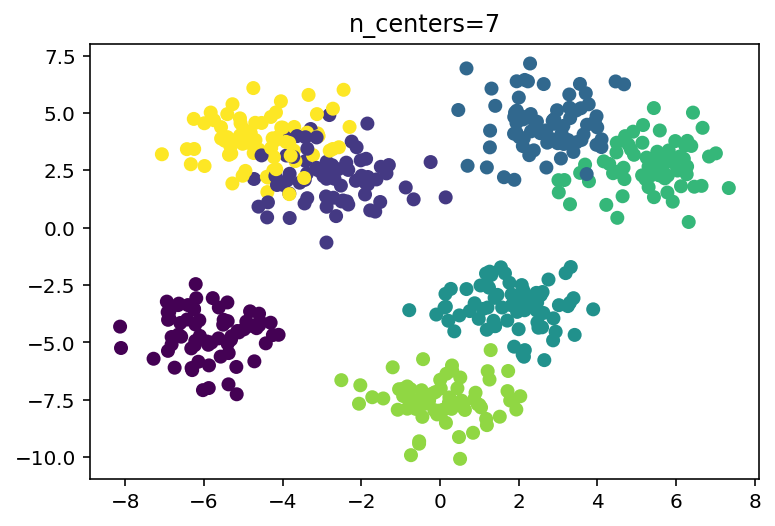

In [77]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=250, centers=7) 
scatter_blobs(X,y,"n_centers=7")

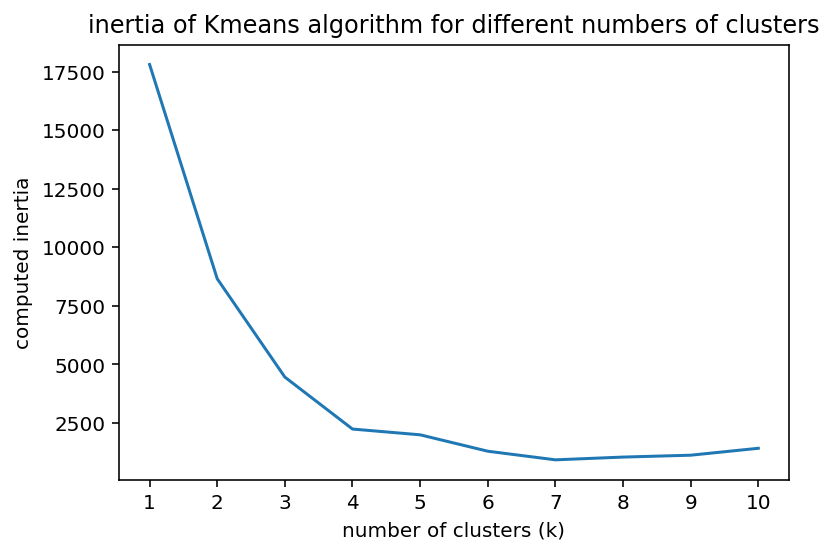

In [78]:
plot_inertia(X)

# Results
We can see from the above plots that the algorithm is converging. To select the optimal value of k for k-means based on the graph, we should look at the value of k at which the "elbow" of the inertia vs. k plot occurs. These values are approximately 5, 3 and 7 for the above plots, respectively. These values match with the the ground truth values.

# DBSCAN clustering algorithm 

Let's generate four Gaussian blobs with a line of points connecting two of them. This will be used to illustrate the usage of DBSCAN in sklearn. 

In [79]:
def make_blobs_with_line():
    X, labels = make_blobs(n_samples=500, centers = [[1, 2], [1, 3], [2.5, 3], [6,0]], 
                           cluster_std = 0.2, random_state=216)

    n_point_line = 64
    x0 = np.linspace(6,1,n_point_line)
    y0 = np.linspace(0,3,n_point_line)
    X_ = np.reshape([x0,y0],(2,n_point_line))

    X = np.concatenate((X_.T,X),axis=0)
    labels = np.concatenate(([-1] * n_point_line,labels),axis=0)
    
    return X, labels

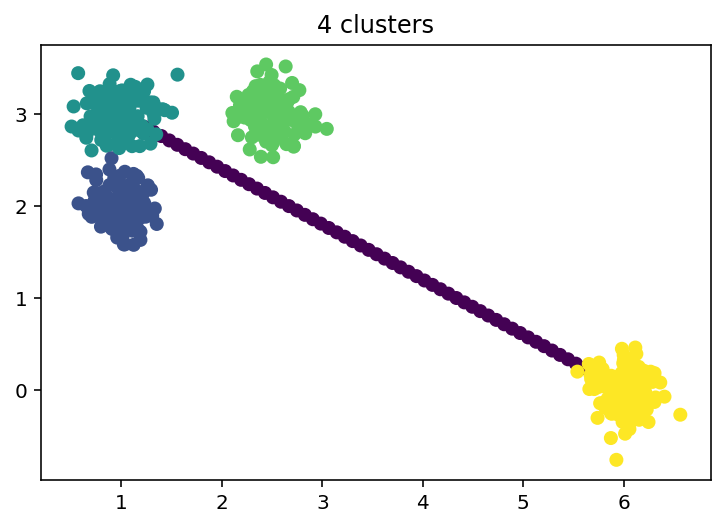

In [80]:
X, labels_truth = make_blobs_with_line()
scatter_blobs(X,labels_truth,"4 clusters")

First, run DBSCAN with the default parameters. 

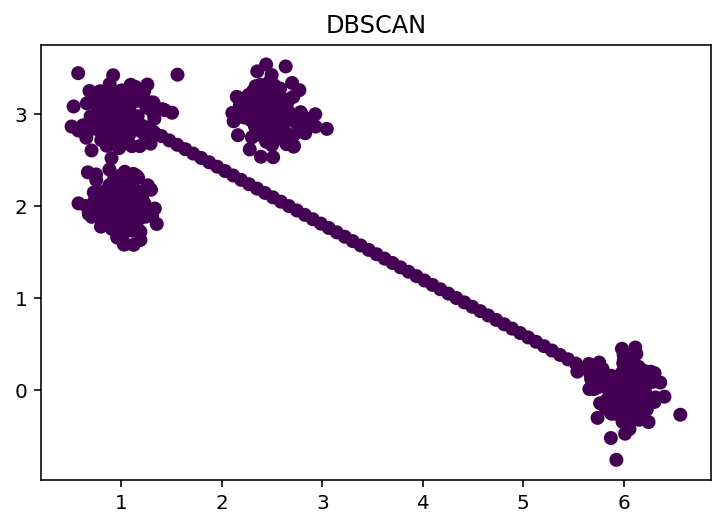

Estimated number of clusters: 1
Estimated number of noise points: 0


In [81]:
db = DBSCAN().fit(X)
scatter_blobs(X,db.labels_,"DBSCAN")

n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Even though there are four clusters according to `make_blobs`, the default values in DBSCAN lead to a single cluster.

# Q3 DBSCAN hyperparameter search

There are two important hyperparameters `eps`, and `min_sample` you can choose to determine how many clusters you may end up with. Implement the function `grid_search()` to perform a grid search of different values of `eps` and `min_sample` to obtain the best clustering. 

In `grid_search()`, you should print out the number of clusters and the number of noise points after each DBSCAN computation. 

Use the function `plot_min_samples()` to graph the result of the clustering. 

A good pair `(eps, min_samples)` should give us the correct number of the clusters and very few noise points. 

In [82]:
class DBSCAN_hyperparameters:

    def __init__(self): 
        self.data_plotly = {"eps": [], "min_samples": [], "point_id": [], "x": [], "y": [], "label": [] }

    def write(self, X, eps, min_samples, labels): 
        """
        Saving the labels and other data to self.data_plotly.
        """
        for point_id, (X_, label) in enumerate(zip(X, labels)):
            self.data_plotly["eps"].append(eps)
            self.data_plotly["min_samples"].append(min_samples)
            self.data_plotly["point_id"].append(point_id)
            self.data_plotly["x"].append(X_[0])
            self.data_plotly["y"].append(X_[1])
            self.data_plotly["label"].append(label)
            
    def finalize(self):
        self.df = pd.DataFrame(self.data_plotly) # convert to panda dataframe
        return self
            
    def plot_min_samples(self, min_samples):
        """
        min_samples: integer scalar; this should be one of the values 
                     previously passed to search() in the list eps_ranges.
        """
        
        assert hasattr(self, 'df') and not self.df.empty, 'You need to run grid_search() before calling this function.'
        
        return px.scatter(self.df[self.df["min_samples"] == min_samples], 
                          title = f"min_samples = {min_samples}", 
                          x="x", y="y", animation_frame="eps", animation_group="point_id",
                          color="label", width=610, height= 600) 

In [83]:
def grid_search(X, eps_ranges=[0.1, 0.5], min_samples_ranges=[2, 10]):
    """
    Grid search to identify the best eps and min_samples.
    eps_ranges and min_samples_ranges should be lists of values to be used in the grid search.
    """
    
    db_hp = DBSCAN_hyperparameters() # required for plotting later on
    
    #eps_ranges = np.arange(eps_ranges[0], eps_ranges[1], 0.1)
    #min_samples_ranges = np.arange(min_samples_ranges[0], min_samples_ranges[1], 1)

    for min_samples in min_samples_ranges:  
        for eps in eps_ranges:        
            
            db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
            n_noise_ = list(db.labels_).count(-1)
            print("Results for eps = {}, min_samples = {} :".format(round(eps, 2), min_samples))
            print("------------------------------------------")
            print("Estimated number of clusters: %d" % n_clusters_)
            print("Estimated number of noise points: %d" % n_noise_)
            print()
            print()
            
            # End your implementation here!
            
            # labels should be set equal to the DBSCAN labels you just computed.

            db_hp.write(X, eps, min_samples, db.labels_) # save data for future plotting
            
    return db_hp.finalize() # return DBSCAN_hyperparameters for plotting with plot_min_samples()

# Q4 DBSCAN hyperparameter exploration and plotting

Test your implementation by running the following cell after you have filled in the proper values in a list for `chosen_eps_ranges` and `chosen_min_samples_ranges`. 

What pairs of the value `(eps, min_sample)` give you the best results? 

# Answer
The pairs that give me the best results are for eps in the range of 0.2 up to 0.25 and for min_sample in the range of 8 up to 20. 

In [84]:
X, labels_truth = make_blobs_with_line()

In [85]:
chosen_eps_ranges = [0.15, 0.17, 0.19, 0.21, 0.23, 0.25] # Please fill in the empty list 
chosen_min_samples_ranges = [8, 12, 16, 20]  # Please fill in the empty list 

DBSCAN_params = grid_search(X, chosen_eps_ranges, chosen_min_samples_ranges) 

Results for eps = 0.15, min_samples = 8 :
------------------------------------------
Estimated number of clusters: 4
Estimated number of noise points: 65


Results for eps = 0.17, min_samples = 8 :
------------------------------------------
Estimated number of clusters: 4
Estimated number of noise points: 57


Results for eps = 0.19, min_samples = 8 :
------------------------------------------
Estimated number of clusters: 4
Estimated number of noise points: 52


Results for eps = 0.21, min_samples = 8 :
------------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 51


Results for eps = 0.23, min_samples = 8 :
------------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 50


Results for eps = 0.25, min_samples = 8 :
------------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 49


Results for eps = 0.15, min_samples = 12 :
---------------------

In [86]:
DBSCAN_params.plot_min_samples(chosen_min_samples_ranges[0])

In [87]:
DBSCAN_params.plot_min_samples(chosen_min_samples_ranges[1])

In [88]:
DBSCAN_params.plot_min_samples(chosen_min_samples_ranges[2])

In [89]:
DBSCAN_params.plot_min_samples(chosen_min_samples_ranges[3])

# Results
By trial and error, it's possible to find pairs of values for (eps, min_samples) that give satisfying clustering results. The pairs are not unique and often a range of values is more or less acceptable. In this case, I have noticed good clustering results (4 clusters identified and very few noise points) with "eps" values ranging from 0.15 to 0.25 and with "min_samples" values ranging from 8 to 20. If desired, these ranges can be further reduced. As could be seen during my trial and error process, when the values for (eps, min_samples) are not optimal, this results in the correct clusters not being identified. In this case, there are either too many or not enough clusters identified, with more or less noise points.

# Q5 Core, Border, Noise points in DBSCAN 

In the DBSCAN algorithm, the points can be classified as `core`, `border`, or `noise`.

A point p is regarded as a `core` point if at least `min_samples` are within distance `eps` of it (including p). 

A point q is a `border` point if it is within a `eps` neighborhood of a `core` point but itself is not a `core` point. 

A point o is a `noise` point if it is neither a `core` point nor a `border` point. 

See also the lecture slides for the definition of these terms.

Implement the function `DBSCAN_point_types(X, eps, min_samples)` using the function `DBSCAN` in sklearn to return the labels of the input `X`, the indices of the core points, the indices of the border points, and the indices of the noise points. All return variables should be of type `list`.

In [90]:
def DBSCAN_point_types(X, eps, min_samples): 
    # Start your implementation here.
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    
    labels = db.labels_
    core_sample_indices = db.core_sample_indices_
    noise_indices = []
    
    for i in range(len(labels)):
        if labels[i] < 0:
            noise_indices.append(i)
    
    border_indices = list(set(np.arange(0, len(labels))).difference(np.append(core_sample_indices, noise_indices)))
    
    return labels, core_sample_indices, border_indices, noise_indices

In [91]:
def draw_DBSCAN_point_types(X, labels, core_sample_indices, border_indices, noise_indices):
  
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[core_sample_indices] = True 

    border_samples_mask = np.zeros_like(labels, dtype=bool)
    border_samples_mask[border_indices] = True 
    
    noise_samples_mask = np.zeros_like(labels, dtype=bool)
    noise_samples_mask[noise_indices] = True     

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise point.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14
        )

        xy = X[class_member_mask & border_samples_mask] if k != -1 else X[class_member_mask & noise_samples_mask]
        plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=6
        )
    plt.title(f"Number of DBSCAN clusters: {len(unique_labels)-1}")
    plt.show()
    
    print(f"Number of DBSCAN clusters: {len(unique_labels)-1:4}")
    print(f"Number of core points:     {len(core_sample_indices):4}")    
    print(f"Number of border points:   {len(border_indices):4}")    
    print(f"Number of noise points:    {len(noise_indices):4}")
    print(f"Number of points:          {X.shape[0]:4}")    

You are given the above function `draw_DBSCAN_point_types`. Run the following cell to test your implementation. 



In [92]:
X, labels_truth = make_blobs_with_line()

In [93]:
labels, core_sample_indices, border_indices, noise_indices = DBSCAN_point_types(X, 0.15, 10)

assert X.shape[0] == len(noise_indices) + len(border_indices) + len(core_sample_indices), "Inconsistency between the size of the set and the number of core+border+noise points"

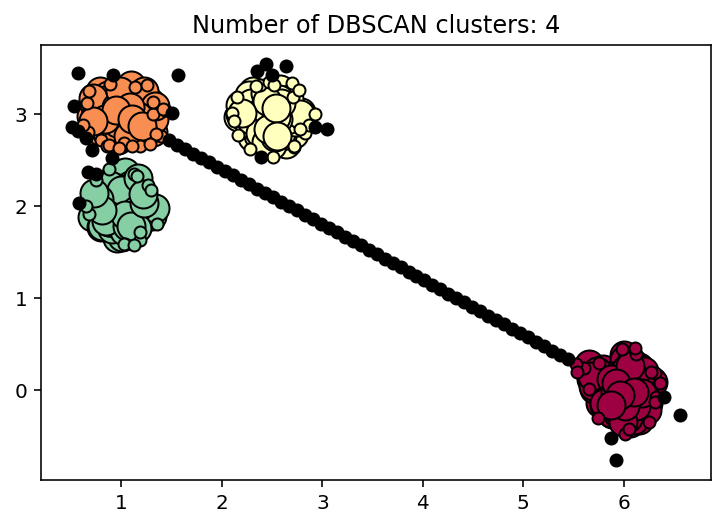

Number of DBSCAN clusters:    4
Number of core points:      418
Number of border points:     71
Number of noise points:      75
Number of points:           564


In [94]:
draw_DBSCAN_point_types(X, labels, core_sample_indices, border_indices, noise_indices)

# Q6 Anisotropically distributed blobs

You were given the following code to generate anisotropically distributed blobs. Run both the k-means algorithm you implemented in Q1 and DBSCAN from sklearn with the best hyperparameters you can find. You should use `DBSCAN_hyperparameter_search` for hyperparameter search for DBSCAN. 

Plot the clusters generated by DBSCAN and k-means. Comment and describe your observations. Which algorithm may be more suitable for this example and why?

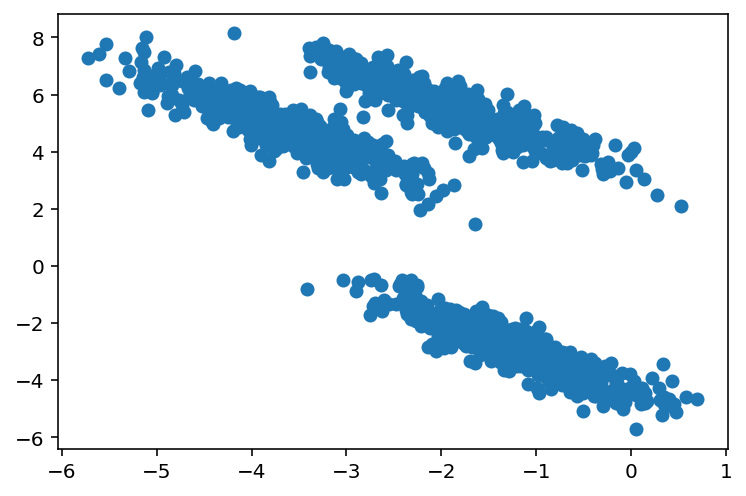

In [95]:
n_samples = 1500
random_state = 172
transformation = [[0.60834549, -0.5], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
plt.scatter(X_aniso[:,0], X_aniso[:,1])

In [96]:
chosen_eps_ranges = np.arange(0.28, 0.34, 0.02)            # student should fill in those value 
chosen_min_samples_ranges = np.arange(2, 5, 1)    # student should fill in those value  

DBSCAN_params = grid_search(X_aniso, chosen_eps_ranges, chosen_min_samples_ranges) 

Results for eps = 0.28, min_samples = 2 :
------------------------------------------
Estimated number of clusters: 8
Estimated number of noise points: 20


Results for eps = 0.3, min_samples = 2 :
------------------------------------------
Estimated number of clusters: 4
Estimated number of noise points: 16


Results for eps = 0.32, min_samples = 2 :
------------------------------------------
Estimated number of clusters: 4
Estimated number of noise points: 12


Results for eps = 0.28, min_samples = 3 :
------------------------------------------
Estimated number of clusters: 4
Estimated number of noise points: 28


Results for eps = 0.3, min_samples = 3 :
------------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 18


Results for eps = 0.32, min_samples = 3 :
------------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 14


Results for eps = 0.28, min_samples = 4 :
------------------------

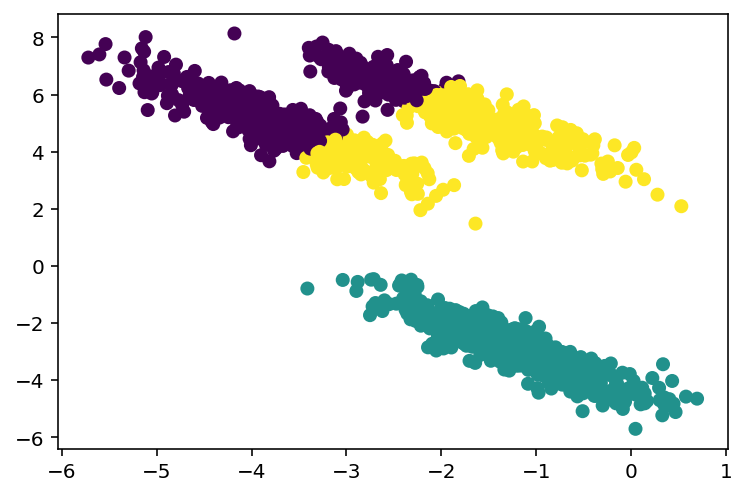

In [97]:
my_kmean = my_KMeans(n_clusters=3) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_aniso) 
plt.scatter(X_aniso[:,0], X_aniso[:,1], c = centroid_idx)

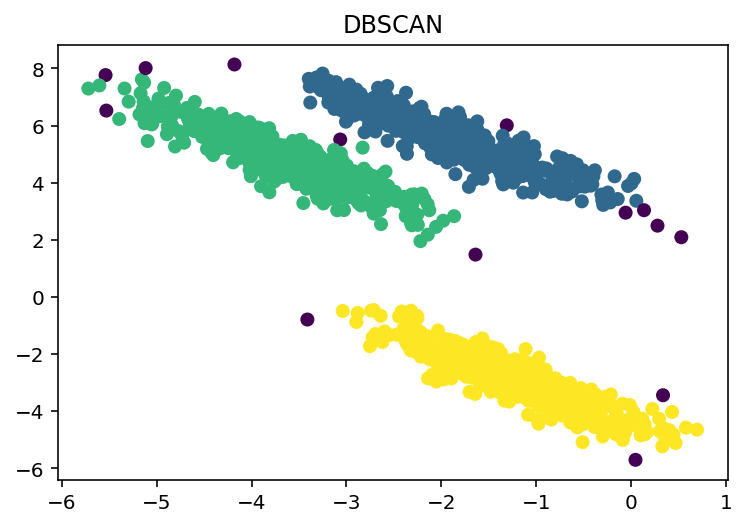

In [98]:
db = DBSCAN(eps=0.32,min_samples=3).fit(X_aniso) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_aniso,db.labels_,"DBSCAN")

# Results
It can be seen that K-Means performs poorly with with anisotropically distributed blobs, while DBSCAN performs great. This is because K-Means tries to separate the data into clusters using straight lines (minimizing the distance between the samples and centroids), while DBSCAN is sensible to the density of the data points for clustering. This makes DBSCAN a great method to deal with non-linear shapes.


It can be seen that both methods do a great job at identifying the clusters with anisotropically distributed blobs. In K-Means however, it seems like a few points are incorrectly labeled, i.e. they are assigned to a cluster but should be assigned to another one. This is not the case with DBSCAN because this method can label points as noise samples. If labeled as such, the points do not belong to any of the identified clusters. This results in DBSCAN having less mislabeled points, but also less points belonging to the clusters. The clusters are more compact with DBSCAN in this case. K-Means requires the desired number of clusters as input, while DBSCAN is just about tweaking the parameters "eps" and "min_samples".

# Q7 Blobs with different variances 

Repeat the previous study on this dataset.

In [99]:
n_samples = 1500
random_state = 172 

# Unequal variance
X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 3, 0.5], random_state=random_state)

In [100]:
chosen_eps_ranges = [1.4, 1.6] # student should fill in those values
chosen_min_samples_ranges = [25, 27, 29]    # student should fill in those values

DBSCAN_params = grid_search(X_varied, chosen_eps_ranges, chosen_min_samples_ranges) 

Results for eps = 1.4, min_samples = 25 :
------------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 121


Results for eps = 1.6, min_samples = 25 :
------------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 69


Results for eps = 1.4, min_samples = 27 :
------------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 128


Results for eps = 1.6, min_samples = 27 :
------------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 84


Results for eps = 1.4, min_samples = 29 :
------------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 138


Results for eps = 1.6, min_samples = 29 :
------------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 90




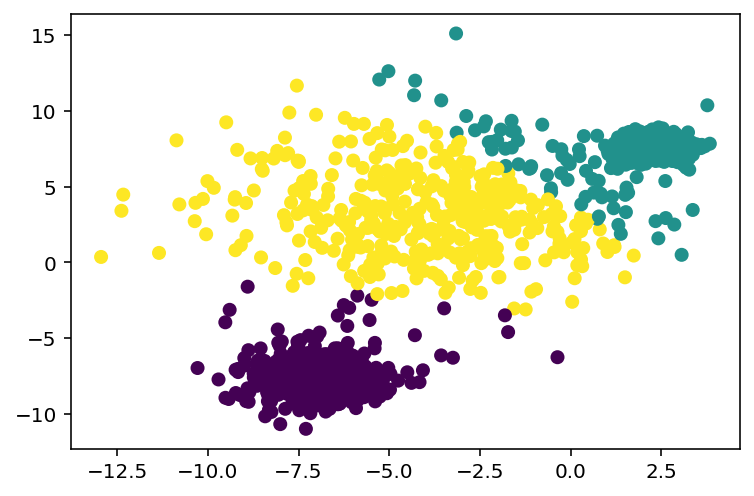

In [101]:
my_kmean = my_KMeans(n_clusters=3) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_varied) 
plt.scatter(X_varied[:,0], X_varied[:,1], c = centroid_idx)

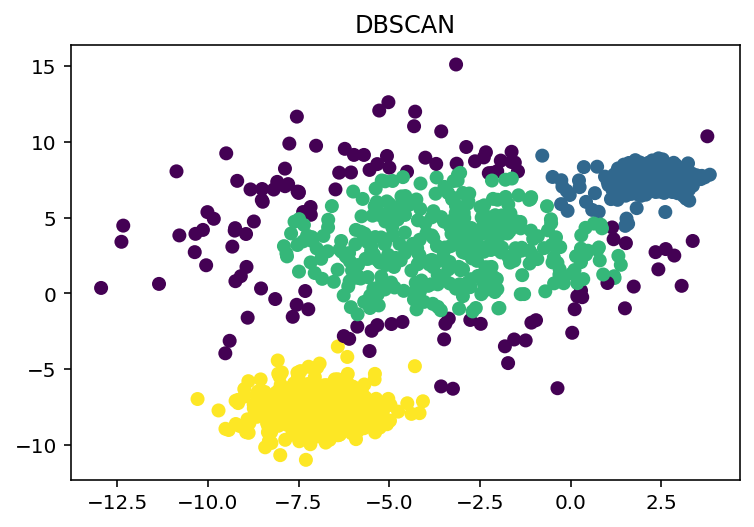

In [102]:
db = DBSCAN(eps=1.4,min_samples=25).fit(X_varied) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_varied,db.labels_,"DBSCAN")

# Results
It can be seen that both methods do a correct job at identifying the clusters with blobs with different variances. It can be seen that K-Means cuts the plane in 3 distinct zones, each corresponding to a cluster. We can see that a lot of the points have been correctly labeled. However, since K-Means is trying to minimize the distance between the points in the clusters and their respective centroids, this results in the clusters being delimited by straight lines instead of spherical-ish shapes (corresponding better to the data). This is not true in DBSCAN, where we can clearly see that the clusters have a relevant shape compared to the data. However, since the parameters "eps" and "min_samples" are equal for all the clusters and since the clusters are close to eachother, it results in a lot of points being labeled as noise points, while they actually belong to clusters. Choosing between K-Means and DBSCAN in this case depends on the application and on the acceptable trade-offs.

# Q8 Blobs with outliers 

Repeat the previous study on this dataset.

In [103]:
def generate_gaussian_blobs_outliers(n_samples):
    X, y = make_blobs(n_samples=n_samples, centers=3, n_features=2, random_state=172)
    X_outlier = random.choices(np.arange(-50, 50, 0.01), k=60)
    X_outlier = np.reshape(X_outlier, (30,2))
    y_outlier = np.asarray([4] * 30)
    X = np.concatenate((X, X_outlier), axis=0)
    y = np.concatenate((y, y_outlier))  
    return X, y, "Gaussian blobs"

In [104]:
X_outlier, _, _ = generate_gaussian_blobs_outliers(500)

In [105]:
chosen_eps_ranges = np.arange(1.4, 2.1, 0.1) # student should fill in those values
chosen_min_samples_ranges = np.arange(16, 21, 1)    # student should fill in those values

DBSCAN_params = grid_search(X_outlier, eps_ranges = chosen_eps_ranges, min_samples_ranges = chosen_min_samples_ranges) 

Results for eps = 1.4, min_samples = 16 :
------------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 30


Results for eps = 1.5, min_samples = 16 :
------------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 29


Results for eps = 1.6, min_samples = 16 :
------------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 29


Results for eps = 1.7, min_samples = 16 :
------------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 29


Results for eps = 1.8, min_samples = 16 :
------------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 29


Results for eps = 1.9, min_samples = 16 :
------------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 29


Results for eps = 2.0, min_samples = 16 :
----------------------

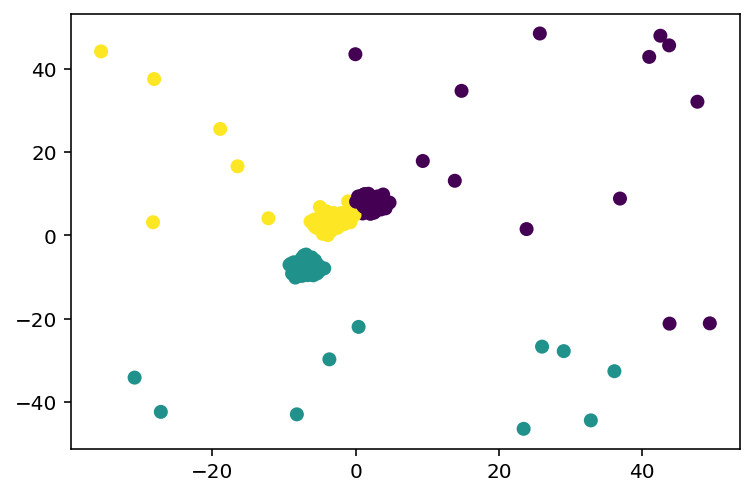

In [106]:
my_kmean = my_KMeans(n_clusters=3) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_outlier) 
plt.scatter(X_outlier[:,0], X_outlier[:,1], c = centroid_idx)

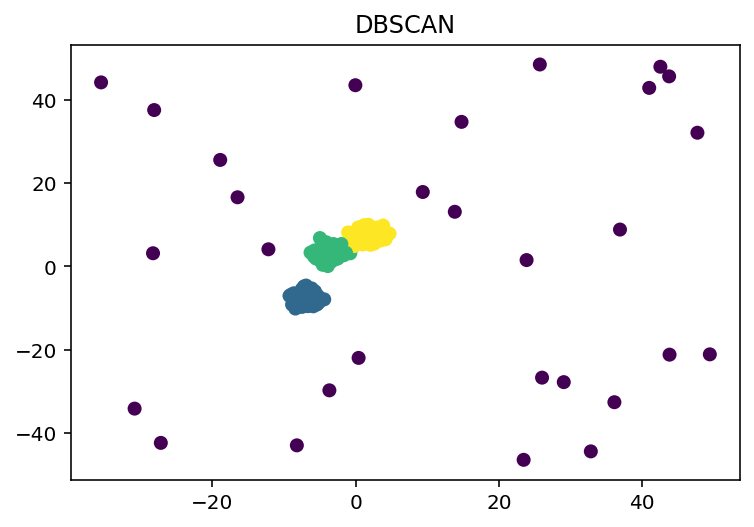

In [107]:
db = DBSCAN(eps=1.6,min_samples=18).fit(X_outlier) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_outlier,db.labels_,"DBSCAN")

# Results
It can be seen that K-Means performs poorly with a lot of outliers, while DBSCAN performs great. This is because DBSCAN is able to label outliers as noise points and not include them in the clusters. K-Means, on the other hand, is not able to do that and mislabeled a lot of samples because the outliers are not neglected to compute the centroids. 

# Q9 Concentric circles with noise 

Repeat the previous study on this dataset. 

In [108]:
n_samples = 500
noisy_circles = make_circles(n_samples=n_samples, factor=0.4, noise=0.065)
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)

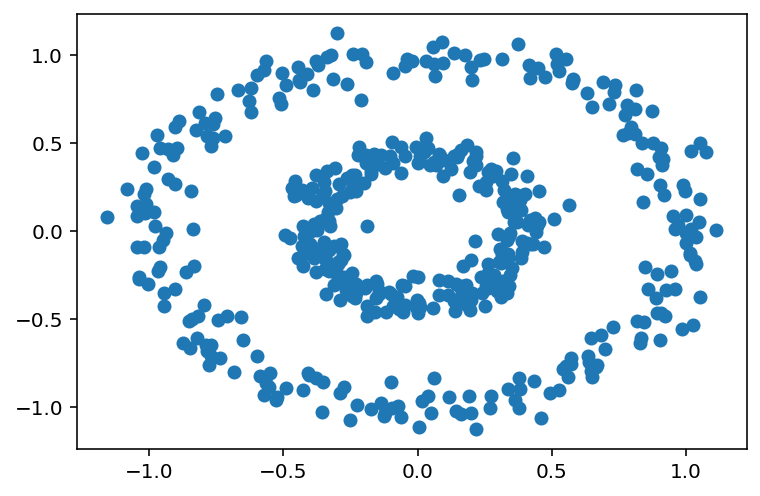

In [109]:
X_circles, y_circles = noisy_circles 
plt.scatter(X_circles[:, 0], X_circles[:, 1])

In [110]:
chosen_eps_ranges = np.arange(0.15, 0.26, 0.02) # student should fill in those values
chosen_min_samples_ranges = np.arange(1, 15, 2)    # student should fill in those values

DBSCAN_params = grid_search(X_circles, eps_ranges = chosen_eps_ranges, min_samples_ranges = chosen_min_samples_ranges ) 

Results for eps = 0.15, min_samples = 1 :
------------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0


Results for eps = 0.17, min_samples = 1 :
------------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0


Results for eps = 0.19, min_samples = 1 :
------------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0


Results for eps = 0.21, min_samples = 1 :
------------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0


Results for eps = 0.23, min_samples = 1 :
------------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0


Results for eps = 0.25, min_samples = 1 :
------------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0


Results for eps = 0.15, min_samples = 3 :
----------------------------

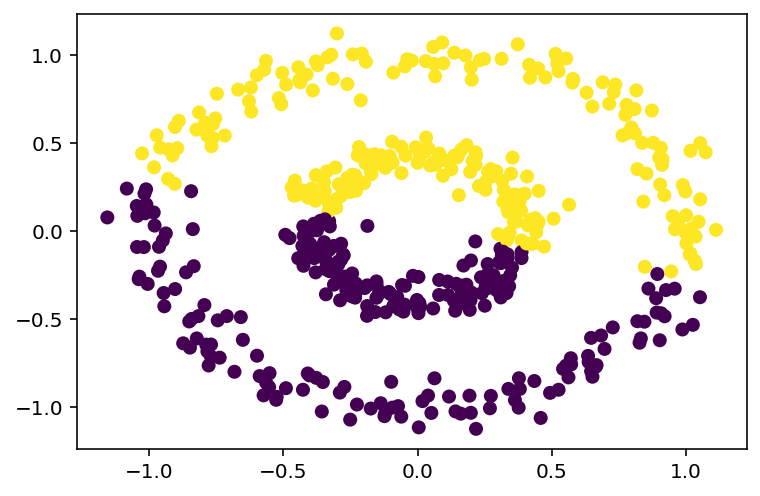

In [111]:
my_kmean = my_KMeans(n_clusters=2) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_circles) 
plt.scatter(X_circles[:,0], X_circles[:,1], c = centroid_idx)

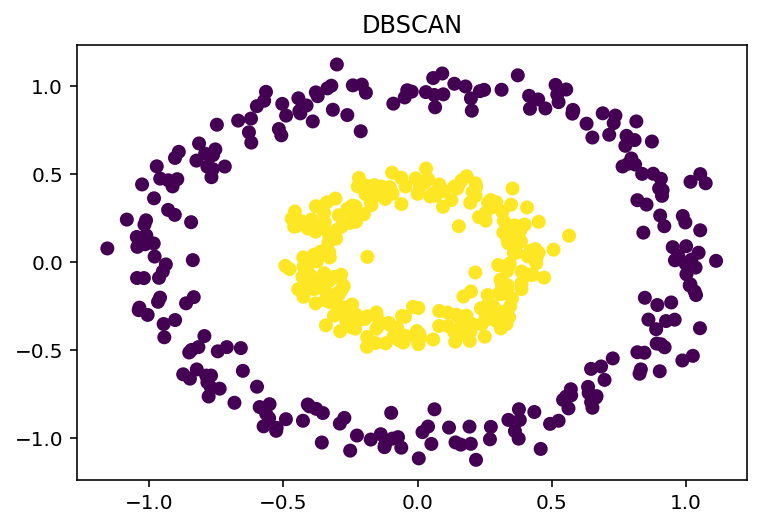

In [112]:
db = DBSCAN(eps=0.23,min_samples=3).fit(X_circles) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_circles,db.labels_,"DBSCAN")

# Results
It can be seen that K-Means performs poorly with complex shapes (noisy circles in this case), while DBSCAN performs great. This is, again, because K-Means tries to separate the data into clusters using straight lines (minimizing the distance between the samples and centroids), while DBSCAN is sensible to the density of the data points for clustering. This makes DBSCAN a great method to deal with complex non-linear shapes.